#### 코랩에서 할 것
- tensorflow 2.x 버전용 

#### 0. 사용 방법

1. 구글드라이브 colab notebook에 파일 업로드(vgg-16 안에 datafiles만)  
<left><img src= "https://user-images.githubusercontent.com/87592790/207219527-7a23e493-8067-447b-8e4c-c7fec7f6055f.png" width="400" height="100">
2. 파일 열기   
  - open file  
<left><img src= "https://user-images.githubusercontent.com/87592790/207218584-1489a324-4c51-457b-9899-12a10e87cd04.png" width="500" height="250">
  - git hub 클릭 후 url 붙여넣기
  - https://github.com/LeticiaKang/HappyVirus/tree/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%20%EC%BD%94%EB%93%9C/VGG-16_Image_Classification  
3. Runtime - Change runtime type 에서 GPU로 바꿔주기
4. 구글드라이브 연동 코드 실행  
<left><img src= "https://user-images.githubusercontent.com/87592790/207219293-8a58863c-7da4-4a66-a980-dbae2bd0621a.png" width="300" height="100">  
5. 이후 순서대로 run
  

### 1. 구글 드라이브 연동

In [8]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

#### 1.1. Import Library¶

In [2]:
# !pip install tensorflow==2.5
# !pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### 1.2. Load Data

In [11]:
# 구글드라이브에 있는 데이터를 불러오는 코드
train_imgs = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/target_images.npy')
train_labels = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/target_labels.npy')
test_imgs = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/test_images.npy')
test_labels = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/test_labels.npy')

# 불러온 데이트 출력해보기
# xxx_imgs : 이미지를 array로 저장한 것을 불러옴
# xxx_labels : 이미지를 one-hot 인코딩으로 저장한 것을 불러옴
print(train_imgs.shape)
print(train_labels[0])  
print(test_imgs.shape)
print(test_labels[0])  

# one-hot 인코딩을 0,1,2,3으로 바꿈
train_labels = np.argmax(train_labels, axis = 1)
test_labels = np.argmax(test_labels, axis = 1)

(243, 224, 224, 3)
[1 0 0 0]
(81, 224, 224, 3)
[1 0 0 0]


In [12]:
# 각각의 train, test데이터의 크기 확인
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

print(n_train)
print(n_test)

243
81


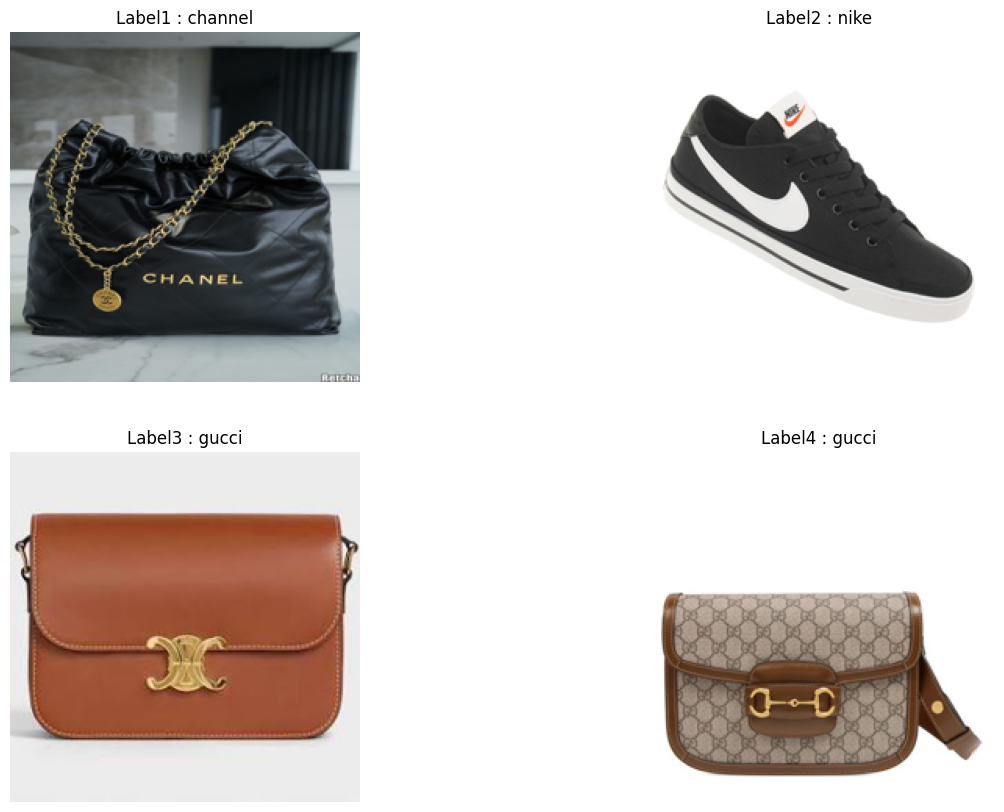

In [14]:
# label이 가질 label names 지정(0:channel, 1:gucci, ...)
Dict =  ["channel","gucci","addidas","nike"]

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.imshow(train_imgs[1])
plt.title("Label1 : {}".format(Dict[train_labels[1]]))
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(train_imgs[2])
plt.title("Label2 : {}".format(Dict[train_labels[2]]))
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(train_imgs[3])
plt.title("Label3 : {}".format(Dict[train_labels[3]]))
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(train_imgs[20])
plt.title("Label4 : {}".format(Dict[train_labels[20]]))
plt.axis('off')
plt.show()


#### 1.3. Load VGG16 Model

- 기존 vgg16은 마지막 layer가 1000개임.
- 우리는 input layer와 output layer만 우리가 조정할 예정.

In [4]:
# 모델 불러오기
model_type = tf.keras.applications.vgg16
base_model = model_type.VGG16()

# 기존에 기억하던 weights를 손상주지 않기 위해 동결
base_model.trainable = False

# 각 layer 보기
base_model.summary()

# 보는 법
# - param : 파라미터 개수
# - Output Shape : [(None, 224, 224, 3)]
# - Trainable params: 0 → trainable한 파라미터의 개수가 있는지, 우리는 False로 설정했다.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### 1.4. Testing for Target Data (생략 가능 - 그냥 이해·확인용)

1/1 [==============================] - 1s 802ms/step
sandal (39.36%)
hand_blower (11.08%)
gasmask (10.12%)
holster (8.24%)
oxygen_mask (4.83%)


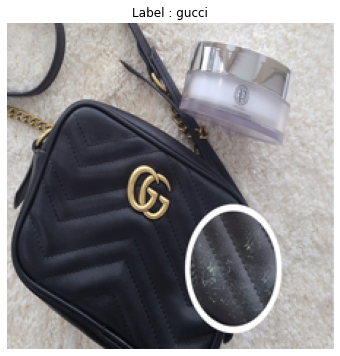

In [ ]:
# idx = np.random.randint(n_test)
# # 기존 모델의 input, output을 설정하지 않고 실행한다.
# pred = base_model.predict(test_imgs[idx].reshape(-1, 224, 224, 3))
# label = model_type.decode_predictions(pred)[0]

# print('%s (%.2f%%)' % (label[0][1], label[0][2]*100))
# print('%s (%.2f%%)' % (label[1][1], label[1][2]*100))
# print('%s (%.2f%%)' % (label[2][1], label[2][2]*100))
# print('%s (%.2f%%)' % (label[3][1], label[3][2]*100))
# print('%s (%.2f%%)' % (label[4][1], label[4][2]*100))
    
# plt.figure(figsize = (6,6))
# plt.imshow(test_imgs[idx])
# plt.title("Label : {}".format(Dict[test_labels[idx]]))
# plt.axis('off')
# plt.show()    

# # 결과를 보면 sandal(39.36%), hand_blower(11.08%), gasmask (10.12%)등 일치하지 않음을 볼 수 있다.

#### 2. Learn From Scratchm

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters = 32, 
#                            kernel_size = (3,3), 
#                            activation = 'relu',
#                            padding = 'SAME',
#                            input_shape = (224, 224, 3)), #input으로 들어가는 이미지의 크기(224,224)와 색(3rgb)
    
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Conv2D(filters = 64, 
#                            kernel_size = (3,3), 
#                            activation = 'relu',
#                            padding = 'SAME'),
    
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Conv2D(filters = 64, 
#                            kernel_size = (3,3), 
#                            activation = 'relu',
#                            padding = 'SAME'),
    
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Conv2D(filters = 64, 
#                            kernel_size = (3,3), 
#                            activation = 'relu',
#                            padding = 'SAME'),
    
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Flatten(),
    
#     tf.keras.layers.Dense(units = 128, activation = 'relu'),
    
#     tf.keras.layers.Dense(units = 4, activation = 'softmax')
# ])

In [ ]:
# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = 'accuracy')

In [ ]:
# model.fit(train_imgs, train_labels, batch_size = 10, epochs = 10)

Epoch 1/10
25/25 [==============================] - 23s 899ms/step - loss: 33.7543 - accuracy: 0.2675
Epoch 2/10
25/25 [==============================] - 22s 892ms/step - loss: 1.2897 - accuracy: 0.3827
Epoch 3/10
25/25 [==============================] - 22s 889ms/step - loss: 1.0503 - accuracy: 0.5226
Epoch 4/10
25/25 [==============================] - 23s 900ms/step - loss: 0.7049 - accuracy: 0.7037
Epoch 5/10
25/25 [==============================] - 22s 897ms/step - loss: 0.5857 - accuracy: 0.7572
Epoch 6/10
25/25 [==============================] - 25s 1s/step - loss: 0.4872 - accuracy: 0.7984
Epoch 7/10
25/25 [==============================] - 22s 896ms/step - loss: 0.4438 - accuracy: 0.8066
Epoch 8/10
25/25 [==============================] - 22s 893ms/step - loss: 0.3189 - accuracy: 0.8848
Epoch 9/10
25/25 [==============================] - 22s 896ms/step - loss: 0.3961 - accuracy: 0.8395
Epoch 10/10
25/25 [==============================] - 23s 901ms/step - loss: 0.5684 - accuracy

In [ ]:
# test_loss, test_acc = model.evaluate(test_imgs, test_labels)

3/3 [==============================] - 3s 621ms/step - loss: 1.7570 - accuracy: 0.4938


### 3. Transfer Learning
#### 3.1. Pre-trained Weights, Biases

In [5]:
# base모델의 가중치를 다 가져와서 모델을 만들었음
vgg16_weights = base_model.get_weights()

# vgg16_weights # 가중치 확인

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

#### 3.2. Build a Transfer Learning Model

In [17]:
# 마지막 레이어 전까지 가져옴
fc2_layer = base_model.layers[-2].output

# # 중간에 layer 더 쌓을 수 있음
hidden = tf.keras.layers.Dense(units = 10, activation = 'relu')(fc2_layer)

# 마지막 레이어를 쌓아줌 
# units : label개수(이진분류 : 2, 다진분류 : n) / activation은 그게 맞는 활성함수 지정
output = tf.keras.layers.Dense(units = 4, activation = 'softmax')(fc2_layer)

# 모델을 새로 정의해준다. 
model = tf.keras.Model(inputs = base_model.inputs, outputs = output)

# Trainable params: 16,388
# Non-trainable params: 134,260,544
# 우리가 설정한 마지막 층만 Trainable함을 알 수 있음

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

#### 3.3. Define Loss and Optimizer

In [19]:
# 다진분류라서 아래와 같이 설정한 것임
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = 'accuracy')

#### 3.4. Optimize

In [20]:
# batch_size = k, epochs = n 설정하기기
model.fit(train_imgs, train_labels, batch_size = 10, epochs = 10)

Epoch 1/10


: 

: 

#### 3.5. Test and Evaluate

In [ ]:
# loss와 accuracy 확인
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

3/3 [==============================] - 42s 13s/step - loss: 0.6145 - accuracy: 0.8519


1/1 [==============================] - 1s 594ms/step


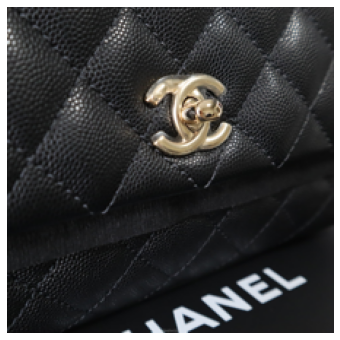

Prediction : nike


In [ ]:
# test_x = random.choice(test_imgs).reshape(-1,224,224,3)
test_x = test_imgs[np.random.choice(n_test, 1)]
pred = np.argmax(model.predict(test_x))

plt.figure(figsize = (6,6))
plt.imshow(test_x.reshape(224, 224, 3))
plt.axis('off')
plt.show()

print('Prediction : {}'.format(Dict[pred]))

In [ ]:
import glob
from PIL import Image
import numpy as np

# test_x = random.choice(test_imgs).reshape(-1,224,224,3)
# 
img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (1).jpg")      #폴더를 열어주고 이미지를 읽음
img = img.convert("RGB")   #RGB로 바꿈
img = img.resize((224, 224))
test_x = np.asarray(img)
test_x = test_x.reshape(-1,224,224,3) 

pred = np.argmax(model.predict(test_x))

plt.figure(figsize = (6,6))
plt.imshow(test_x.reshape(224, 224, 3))
plt.axis('off')
plt.show()

print('Prediction : {}'.format(Dict[pred]))

NameError: name 'model' is not defined